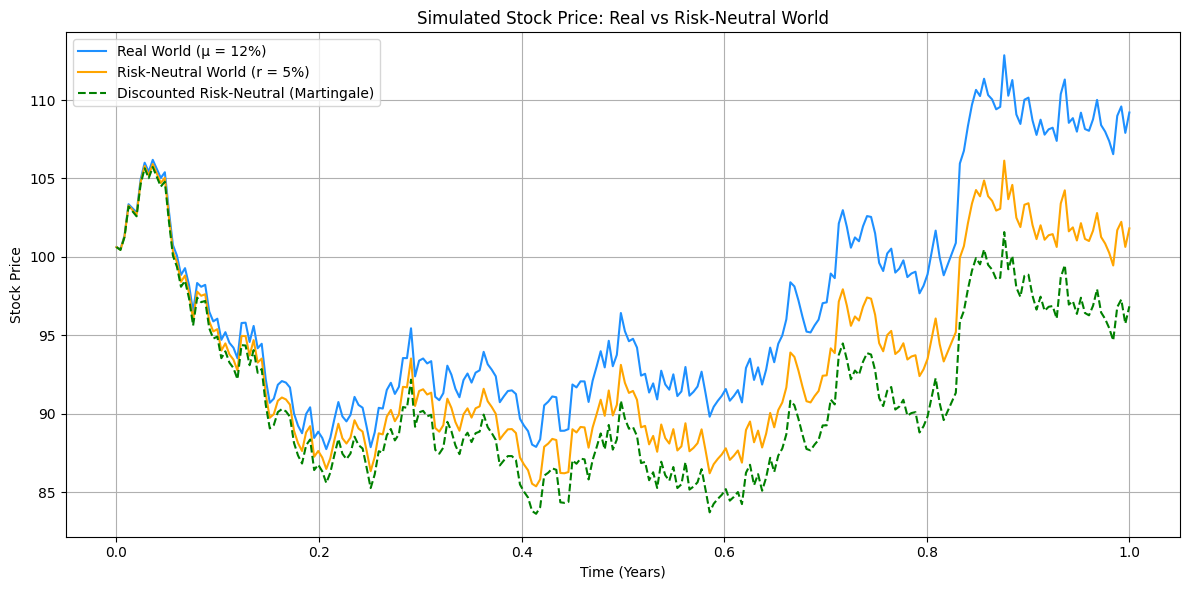

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters
S0 = 100           # Initial stock price
T = 1              # Time in years
n = 252            # Number of trading days
dt = T / n         # Time step
t = np.linspace(0, T, n)

# Real world parameters
mu_real = 0.12     # Real expected return (e.g., 12%)
sigma = 0.2        # Volatility (e.g., 20%)

# Risk-neutral parameters
r = 0.05           # Risk-free rate (e.g., 5%)

# Simulate Brownian motion
W = np.random.standard_normal(size=n)
W = np.cumsum(W) * np.sqrt(dt)

# Simulate stock price in real world
S_real = S0 * np.exp((mu_real - 0.5 * sigma**2) * t + sigma * W)

# Simulate stock price in risk-neutral world
S_rn = S0 * np.exp((r - 0.5 * sigma**2) * t + sigma * W)

# Discounted stock price in risk-neutral world
discounted_S_rn = S_rn * np.exp(-r * t)

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(t, S_real, label="Real World (μ = 12%)", color="dodgerblue")
plt.plot(t, S_rn, label="Risk-Neutral World (r = 5%)", color="orange")
plt.plot(t, discounted_S_rn, label="Discounted Risk-Neutral (Martingale)", linestyle="--", color="green")

plt.title("Simulated Stock Price: Real vs Risk-Neutral World")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
